<a href="https://colab.research.google.com/github/PatilShreya22/6thSem-ML-Lab/blob/main/1BM23CS420_Lab_7_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Default RF Accuracy (n_estimators=10): 1.0000
Best RF Accuracy: 1.0000 with n_estimators = 1


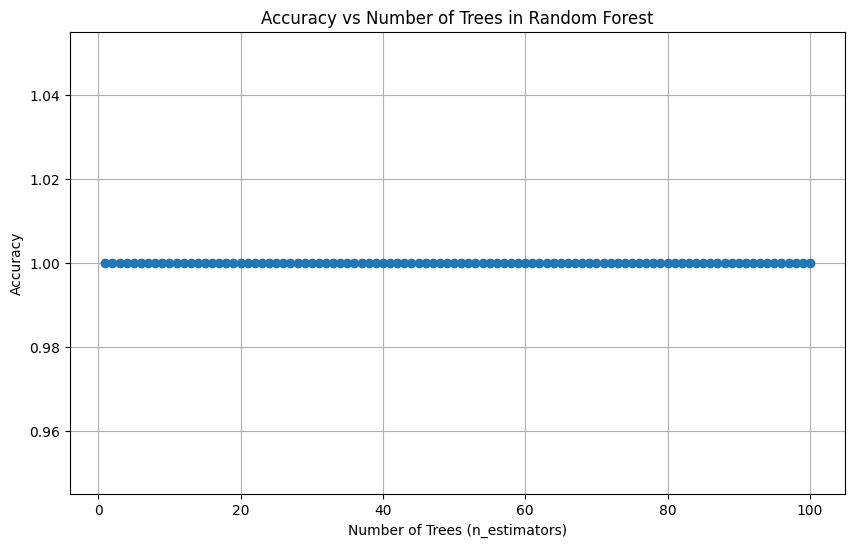

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the iris dataset from CSV
df = pd.read_csv("/content/iris (2).csv")

# Assuming last column is the label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Train RF Classifier with default n_estimators=10
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f"Default RF Accuracy (n_estimators=10): {accuracy_default:.4f}")

# 2. Fine-tune: Try different numbers of trees (1 to 100)
best_accuracy = 0
best_n = 0
accuracies = []

for n in range(1, 101):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    if acc > best_accuracy:
        best_accuracy = acc
        best_n = n

print(f"Best RF Accuracy: {best_accuracy:.4f} with n_estimators = {best_n}")

# Plot accuracy vs. number of trees
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), accuracies, marker='o')
plt.title("Accuracy vs Number of Trees in Random Forest")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
